In [8]:
import pandas as pd  
import numpy as np 
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [9]:
df = pd.read_csv("Walmart_Cleaned_Advanced3_Modified.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          5000 non-null   int64  
 1   customer_id             5000 non-null   int64  
 2   product_id              5000 non-null   int64  
 3   product_name            5000 non-null   object 
 4   category                5000 non-null   object 
 5   quantity_sold           5000 non-null   float64
 6   unit_price              5000 non-null   float64
 7   store_id                5000 non-null   int64  
 8   store_location          5000 non-null   object 
 9   inventory_level         5000 non-null   float64
 10  reorder_point           5000 non-null   int64  
 11  reorder_quantity        5000 non-null   int64  
 12  supplier_id             5000 non-null   int64  
 13  supplier_lead_time      5000 non-null   int64  
 14  customer_age            5000 non-null   

,transaction_id,customer_id,product_id,product_name,category,quantity_sold,unit_price,store_id,store_location,inventory_level,...,holiday_indicator,weekday,stockout_indicator,forecasted_demand,actual_demand,transaction_year,transaction_month,transaction_day,transaction_hour,total_sales
0,1,2824,843,Fridge,Electronics,52.0,0.070963,3,"Miami, FL",246.0,...,0,Friday,1,0.196127,0.211905,2024,3,31,21,11.853814
1,2,1409,135,TV,Electronics,72.0,0.954963,5,"Dallas, TX",38.7,...,0,Monday,1,0.988395,0.938095,2024,7,28,12,324.023570
2,3,5506,391,Fridge,Electronics,84.0,0.680933,1,"Los Angeles, CA",411.0,...,0,Tuesday,1,0.830916,0.776190,2024,6,10,4,194.877271
3,4,5012,710,Smartphone,Electronics,46.0,0.067809,5,"Miami, FL",452.0,...,1,Sunday,1,0.794589,0.847619,2024,8,15,1,12.323169
4,5,4657,116,Laptop,Electronics,0.5,0.230378,6,"Chicago, IL",412.0,...,0,Thursday,1,0.903365,0.902381,2024,9,13,0,0.255095


In [10]:
# Sales and Product Insights

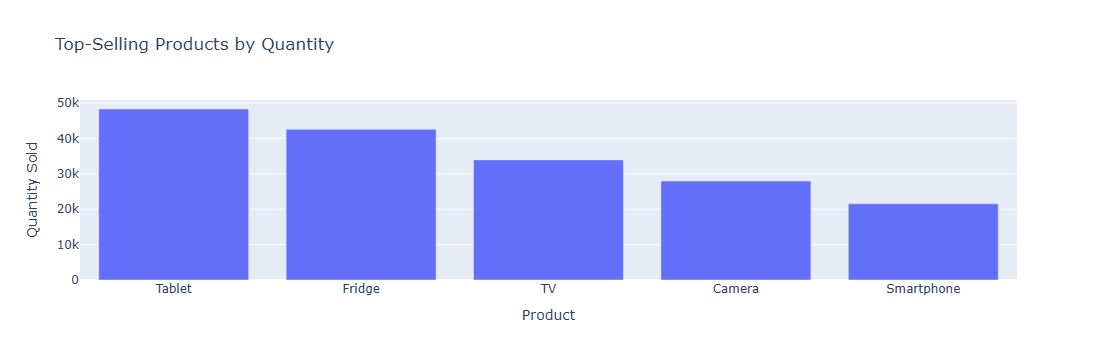

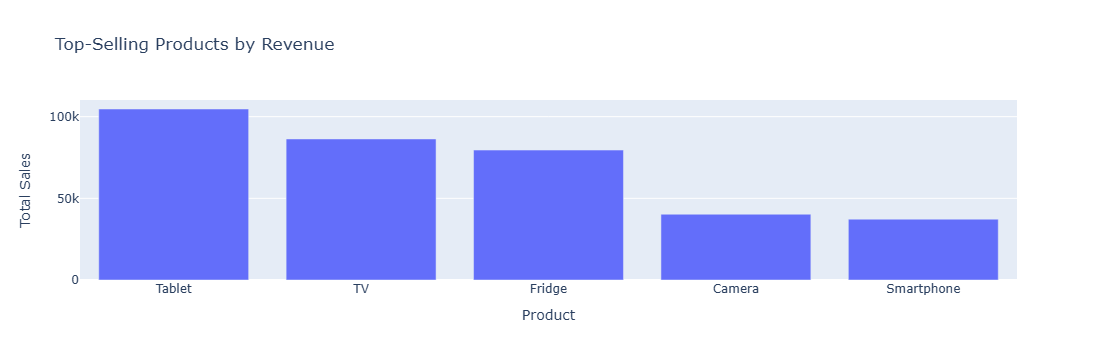

In [11]:
# 1. Top-Selling Products
top_products_quantity = df.groupby('product_name')['quantity_sold'].sum().nlargest(5).reset_index()
top_products_revenue = df.groupby('product_name')['total_sales'].sum().nlargest(5).reset_index()

fig1 = px.bar(top_products_quantity, x='product_name', y='quantity_sold', title='Top-Selling Products by Quantity', labels={'quantity_sold': 'Quantity Sold', 'product_name': 'Product'})
fig2 = px.bar(top_products_revenue, x='product_name', y='total_sales', title='Top-Selling Products by Revenue', labels={'total_sales': 'Total Sales', 'product_name': 'Product'})
fig1.show()
fig2.show()

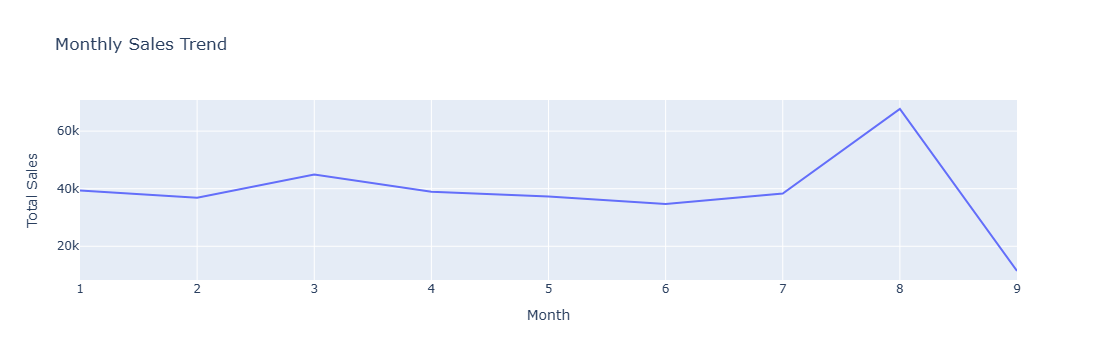

In [12]:
# 2. Sales Trends Over Time
monthly_sales = df.groupby('transaction_month')['total_sales'].sum().reset_index()
fig3 = px.line(monthly_sales, x='transaction_month', y='total_sales', title='Monthly Sales Trend', labels={'total_sales': 'Total Sales', 'transaction_month': 'Month'})
fig3.show()

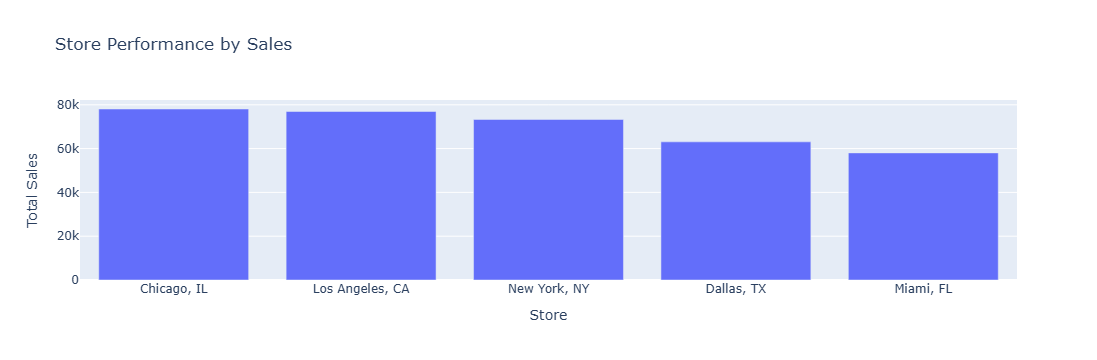

In [13]:
# 3. Best Performing Stores
store_performance = df.groupby('store_location')['total_sales'].sum().nlargest(5).reset_index()
fig4 = px.bar(store_performance, x='store_location', y='total_sales', title='Store Performance by Sales', labels={'total_sales': 'Total Sales', 'store_location': 'Store'})
fig4.show()

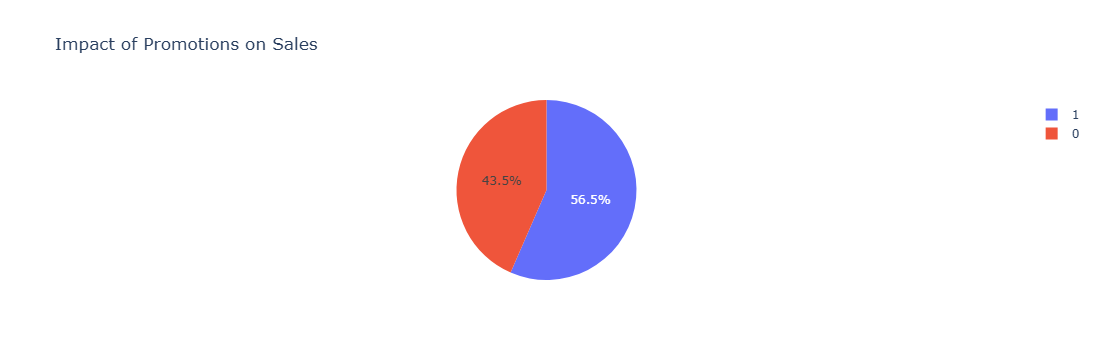

In [14]:
# 4. Impact of Promotions
promotion_sales = df.groupby('promotion_applied')['total_sales'].sum().reset_index()
fig5 = px.pie(values=promotion_sales['total_sales'], names=promotion_sales['promotion_applied'], title='Impact of Promotions on Sales')
fig5.show()

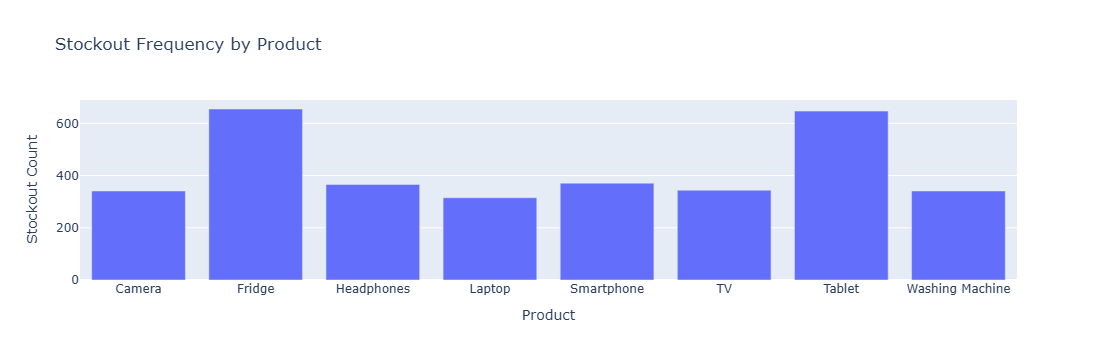

In [15]:
# 5. Stockout Issues
stockout_products = df[df['stockout_indicator'] == 1].groupby('product_name').size().reset_index(name='stockout_count')
fig6 = px.bar(stockout_products, x='product_name', y='stockout_count', title='Stockout Frequency by Product', labels={'stockout_count': 'Stockout Count', 'product_name': 'Product'})
fig6.show()

In [16]:
# Customer Behavior & Demographics

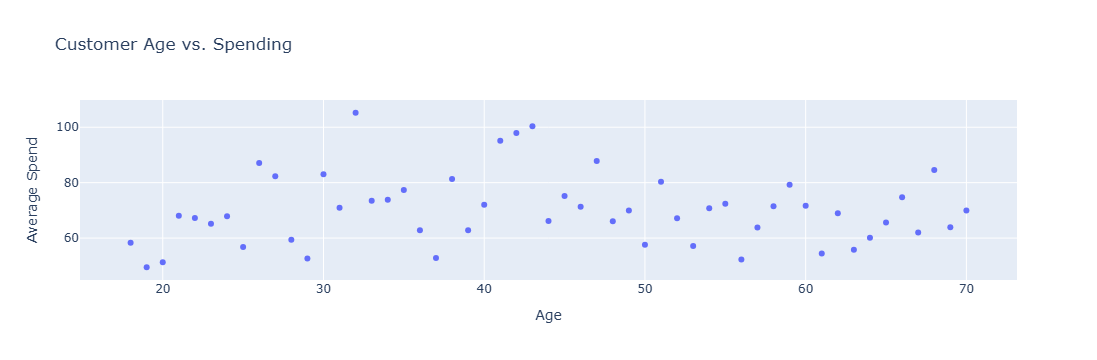

In [19]:
# 6. Age Group with Highest Spending
age_spending = df.groupby('customer_age')['total_sales'].mean().reset_index()
fig7 = px.scatter(age_spending, x='customer_age', y='total_sales', title='Customer Age vs. Spending', labels={'customer_age': 'Age', 'total_sales': 'Average Spend'})
fig7.show()

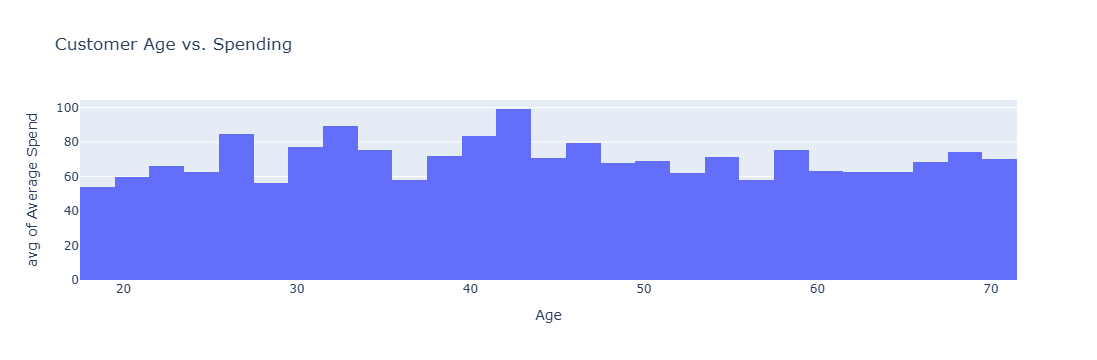

In [20]:
age_spending = df.groupby('customer_age')['total_sales'].mean().reset_index()

fig7 = px.histogram(age_spending, x='customer_age', y='total_sales', 
                    title='Customer Age vs. Spending',
                    labels={'customer_age': 'Age', 'total_sales': 'Average Spend'},
                    nbins=30, histfunc='avg') 

fig7.show()


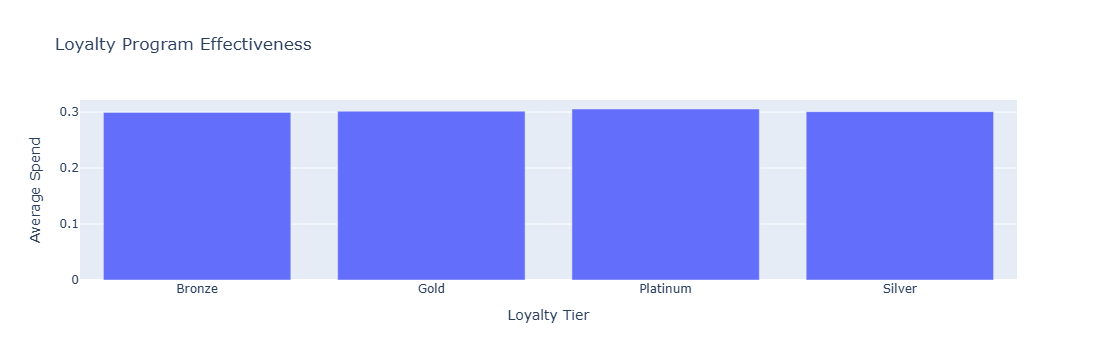

In [61]:
# 7. Loyalty Program Effectiveness
loyalty_spending = df.groupby('customer_loyalty_level')['total_sales'].mean().reset_index()
fig8 = px.bar(loyalty_spending, x='customer_loyalty_level', y='total_sales', title='Loyalty Program Effectiveness', labels={'total_sales': 'Average Spend', 'customer_loyalty_level': 'Loyalty Tier'})
fig8.show()

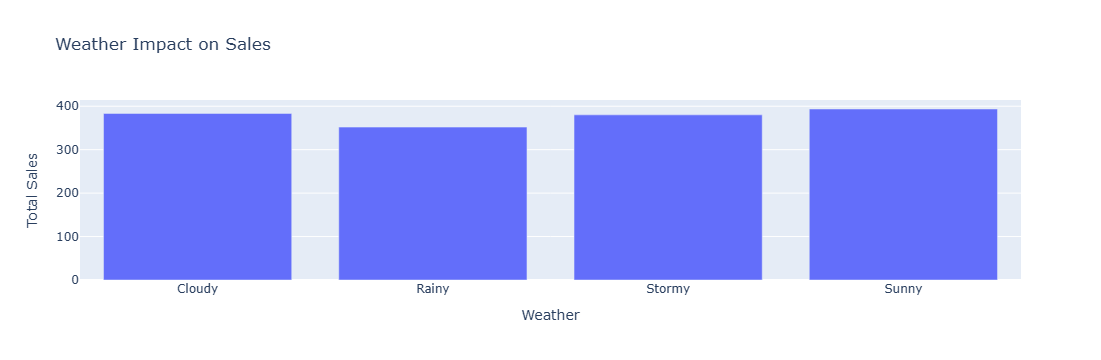

In [62]:
# 8. Weather Impact on Sales
weather_sales = df.groupby('weather_conditions')['total_sales'].sum().reset_index()
fig9 = px.bar(weather_sales, x='weather_conditions', y='total_sales', title='Weather Impact on Sales', labels={'total_sales': 'Total Sales', 'weather_conditions': 'Weather'})
fig9.show()



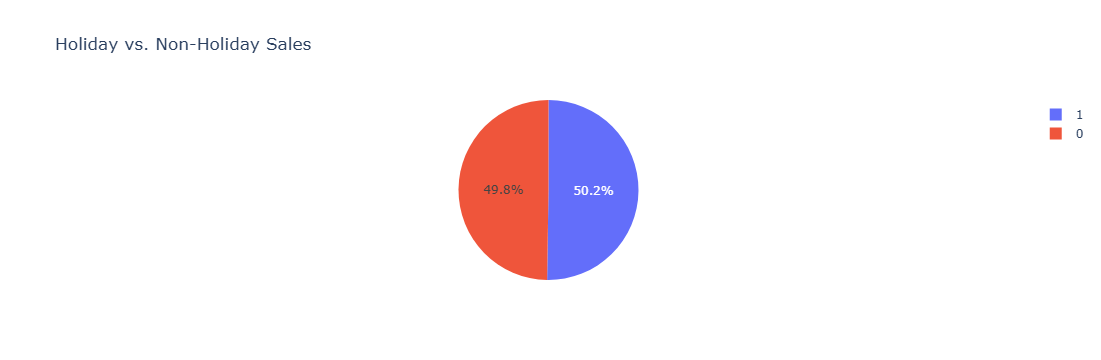

In [63]:
# 9. Holiday vs. Non-Holiday Sales
holiday_sales = df.groupby('holiday_indicator')['total_sales'].sum().reset_index()
fig10 = px.pie(values=holiday_sales['total_sales'], names=holiday_sales['holiday_indicator'], title='Holiday vs. Non-Holiday Sales')
fig10.show()


In [64]:
# Forecasting & Inventory Insights

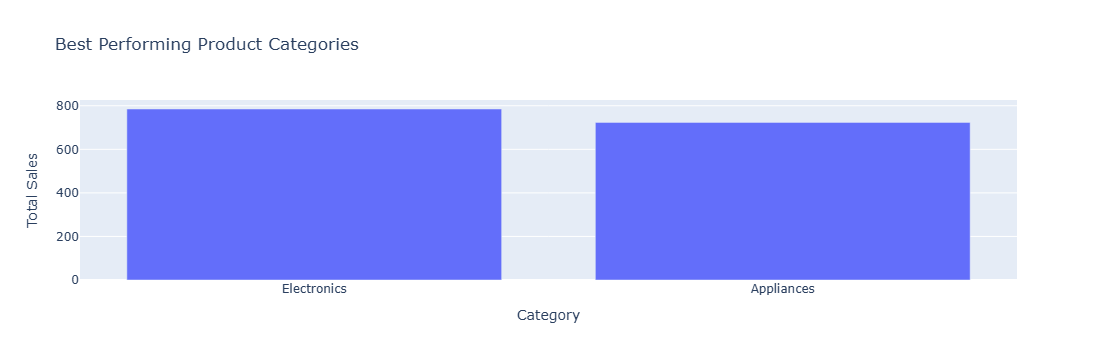

In [66]:
# 11. Best Performing Product Categories
category_performance = df.groupby('category')['total_sales'].sum().nlargest(5).reset_index()
fig11 = px.bar(category_performance, x='category', y='total_sales', title='Best Performing Product Categories', labels={'total_sales': 'Total Sales', 'category': 'Category'})
fig11.show()


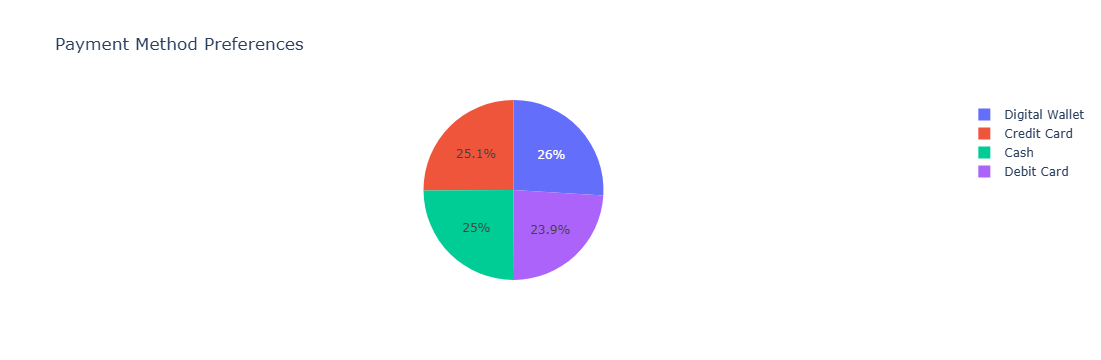

In [67]:
# 12. Payment Method Preferences
payment_methods = df.groupby('payment_method')['total_sales'].sum().reset_index()
fig12 = px.pie(values=payment_methods['total_sales'], names=payment_methods['payment_method'], title='Payment Method Preferences')
fig12.show()

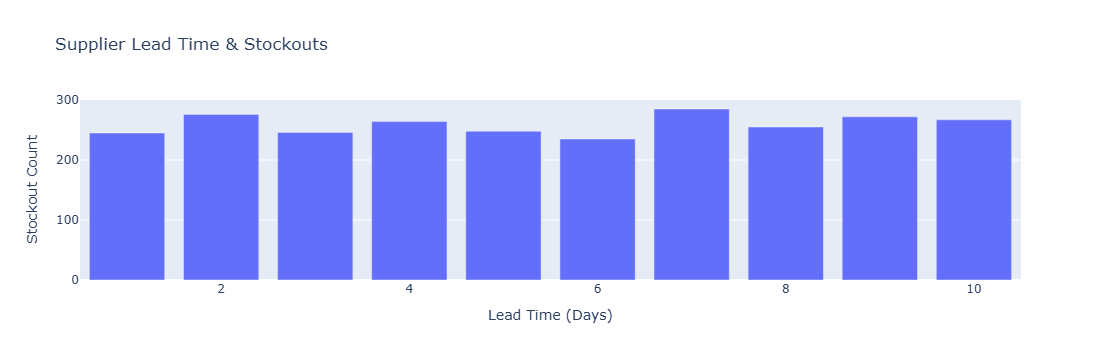

In [68]:
# 13. Supplier Lead Time & Stockouts
lead_time_stockouts = df.groupby('supplier_lead_time')['stockout_indicator'].sum().reset_index()
fig13 = px.bar(lead_time_stockouts, x='supplier_lead_time', y='stockout_indicator', title='Supplier Lead Time & Stockouts', labels={'stockout_indicator': 'Stockout Count', 'supplier_lead_time': 'Lead Time (Days)'})
fig13.show()

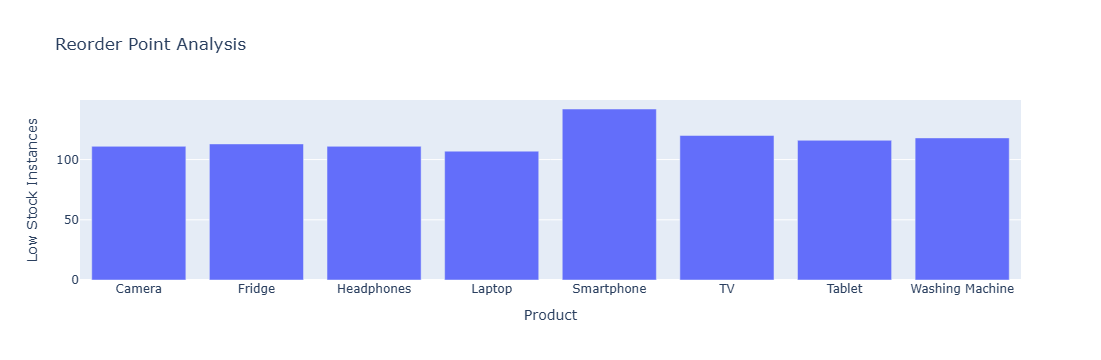

In [69]:
# 14. Reorder Point Analysis
reorder_analysis = df[df['inventory_level'] < df['reorder_point']].groupby('product_name').size().reset_index(name='low_stock_count')
fig14 = px.bar(reorder_analysis, x='product_name', y='low_stock_count', title='Reorder Point Analysis', labels={'low_stock_count': 'Low Stock Instances', 'product_name': 'Product'})
fig14.show()


In [70]:
# Customer & Transaction Patterns

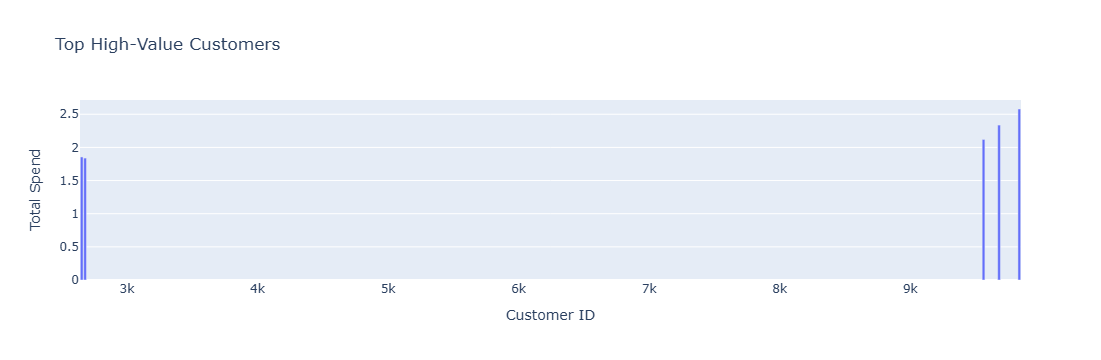

In [71]:
# 15. Top High-Value Customers
top_customers = df.groupby('customer_id')['total_sales'].sum().nlargest(5).reset_index()
fig15 = px.bar(top_customers, x='customer_id', y='total_sales', title='Top High-Value Customers', labels={'total_sales': 'Total Spend', 'customer_id': 'Customer ID'})
fig15.show()


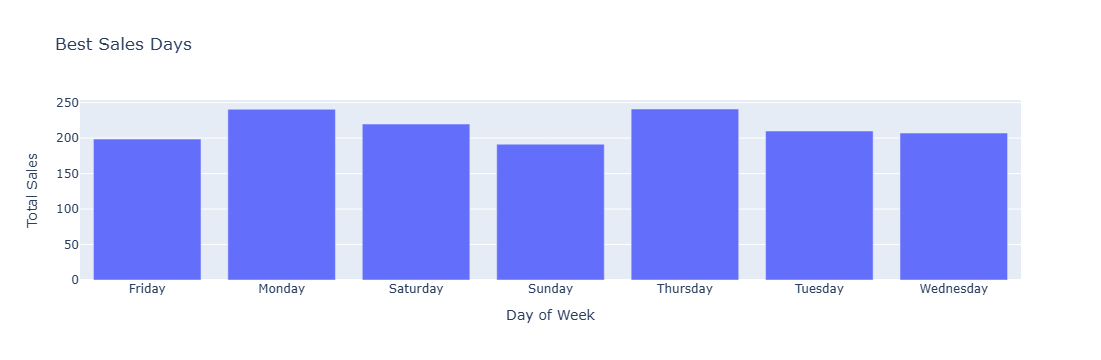

In [72]:
# 16. Best Sales Days
sales_by_day = df.groupby('weekday')['total_sales'].sum().reset_index()
fig16 = px.bar(sales_by_day, x='weekday', y='total_sales', title='Best Sales Days', labels={'total_sales': 'Total Sales', 'weekday': 'Day of Week'})
fig16.show()


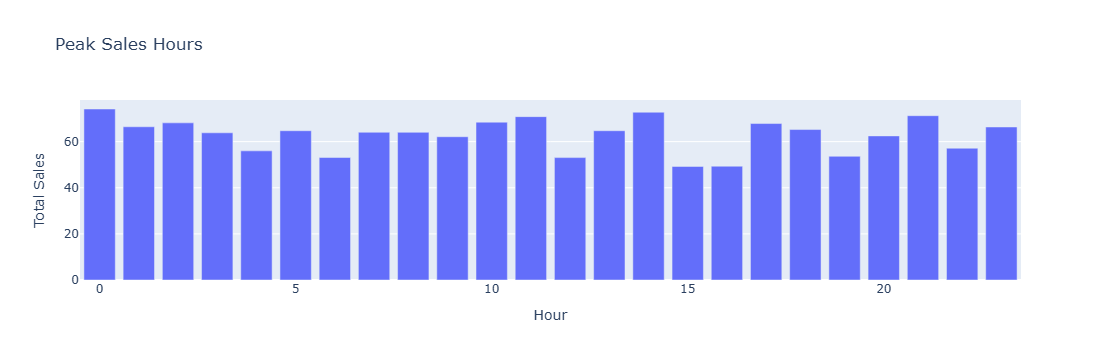

In [73]:
# 17. Peak Sales Hours
sales_by_hour = df.groupby('transaction_hour')['total_sales'].sum().reset_index()
fig17 = px.bar(sales_by_hour, x='transaction_hour', y='total_sales', title='Peak Sales Hours', labels={'total_sales': 'Total Sales', 'transaction_hour': 'Hour'})
fig17.show()


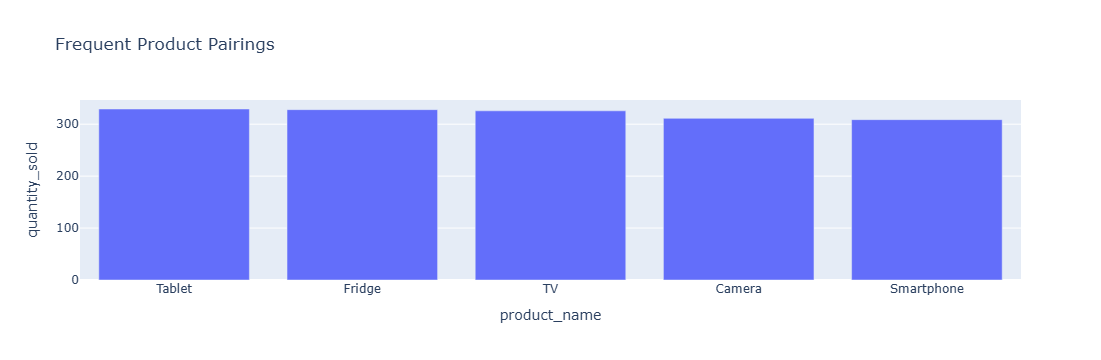

In [74]:

# 18. Frequent Product Pairings
product_pairings = df.groupby('product_name')['quantity_sold'].sum().nlargest(5).reset_index()
fig18 = px.bar(product_pairings, x='product_name', y='quantity_sold', title='Frequent Product Pairings')
fig18.show()


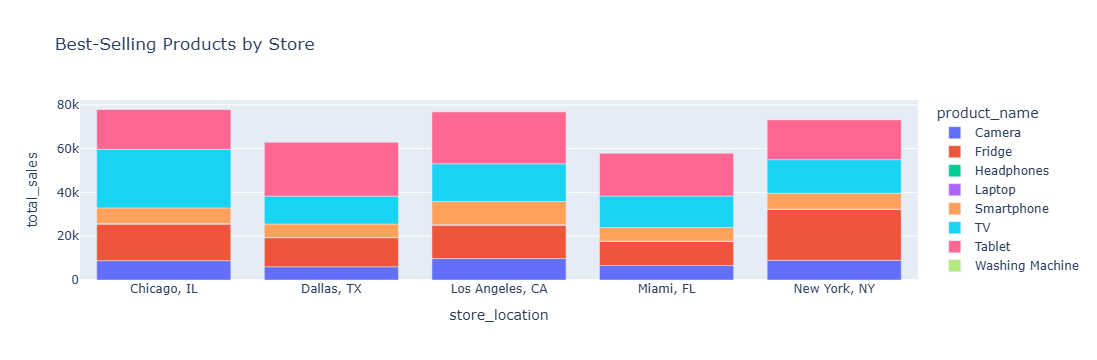

In [22]:

# 19. Best-Selling Products by Store
store_product_sales = df.groupby(['store_location', 'product_name'])['total_sales'].sum().reset_index()
fig19 = px.bar(store_product_sales, x='store_location', y='total_sales', color='product_name', title='Best-Selling Products by Store')
fig19.show()


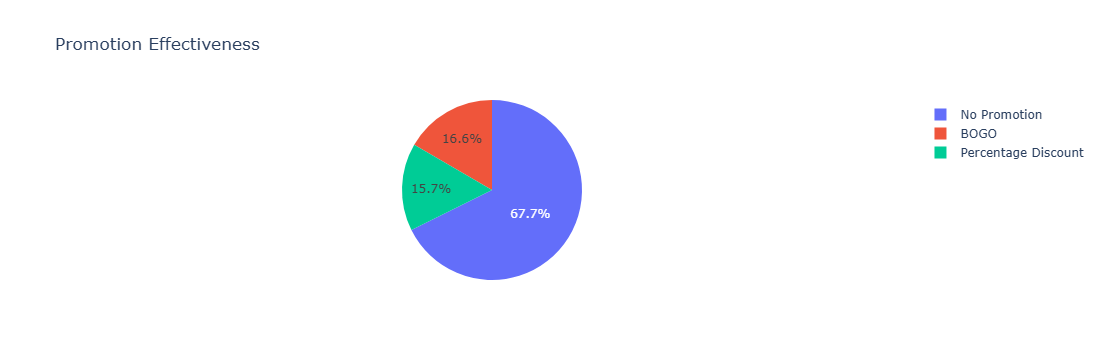

In [76]:

# 20. Promotion Effectiveness
promotion_effectiveness = df.groupby('promotion_type')['total_sales'].sum().reset_index()
fig20 = px.pie(values=promotion_effectiveness['total_sales'], names=promotion_effectiveness['promotion_type'], title='Promotion Effectiveness')
fig20.show()
